In [44]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
yf.pdr_override()
now_time = dt.datetime.now()
print(now_time)

2020-10-20 07:52:18.759970


In [47]:
startyear = 2000
startmonth = 1
startday = 4
start_time = dt.datetime(startyear, startmonth, startday)
print(start_time)

2000-01-04 00:00:00


In [48]:
symbol_nikkei = '^N225'
symbol_hsi = '^HSI'
symbol_daxi = '^GDAXI'
symbol_cac40 = '^FCHI'
symbol_sp500 = '^GSPC'
symbol_dji = '^DJI'
symbol_nasdaq = '^IXIC'
symbol_spy = 'SPY'
symbol_aord = '^AORD'

In [49]:
stock_nikkei = pdr.get_data_yahoo(symbol_nikkei, start_time, now_time)
stock_nikkei.to_csv(symbol_nikkei + "_data.csv")

stock_hsi = pdr.get_data_yahoo(symbol_hsi, start_time, now_time)
stock_hsi.to_csv(symbol_hsi + "_data.csv")

stock_daxi = pdr.get_data_yahoo(symbol_daxi, start_time, now_time)
stock_daxi.to_csv(symbol_daxi + "_data.csv")

stock_cac40 = pdr.get_data_yahoo(symbol_cac40, start_time, now_time)
stock_cac40.to_csv(symbol_cac40 + "_data.csv")

stock_sp500 = pdr.get_data_yahoo(symbol_sp500, start_time, now_time)
stock_sp500.to_csv(symbol_sp500 + "_data.csv")

stock_dji = pdr.get_data_yahoo(symbol_dji, start_time, now_time)
stock_dji.to_csv(symbol_dji + "_data.csv")

stock_nasdaq = pdr.get_data_yahoo(symbol_nasdaq, start_time, now_time)
stock_nasdaq.to_csv(symbol_nasdaq + "_data.csv")

stock_spy = pdr.get_data_yahoo(symbol_spy, start_time, now_time)
stock_spy.to_csv(symbol_spy + "_data.csv")

stock_aord = pdr.get_data_yahoo(symbol_aord, start_time, now_time)
stock_aord.to_csv(symbol_aord + "_data.csv")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


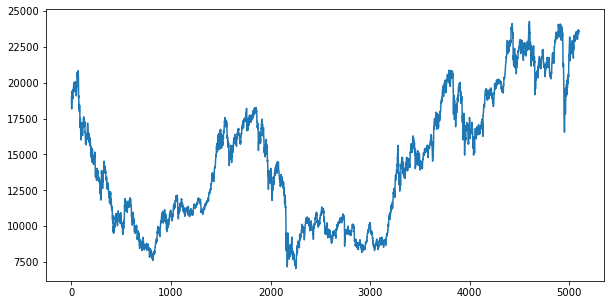

In [50]:
stock_nikkei = pd.read_csv('../prediction/' + symbol_nikkei + '_data.csv')

plt.figure(figsize=(10,5))
stock_nikkei['Close'].plot()
plt.show()

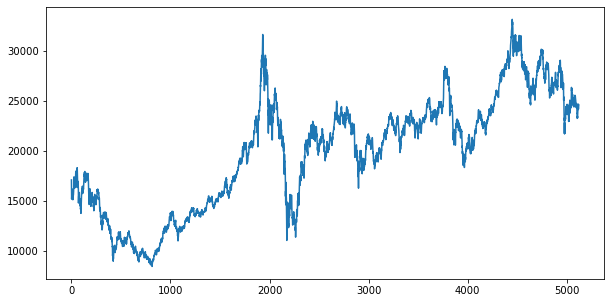

In [51]:
stock_hsi = pd.read_csv('../prediction/' + symbol_hsi + '_data.csv')

plt.figure(figsize=(10,5))
stock_hsi['Close'].plot()
plt.show()

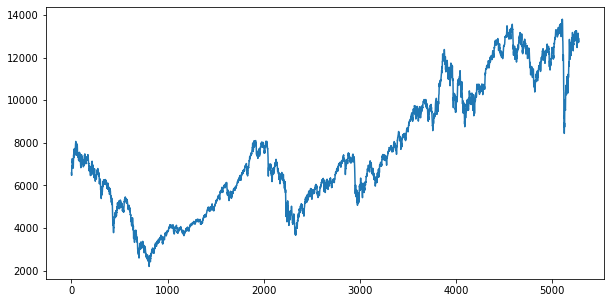

In [52]:
stock_daxi = pd.read_csv('../prediction/' + symbol_daxi + '_data.csv')

plt.figure(figsize=(10,5))
stock_daxi['Close'].plot()
plt.show()

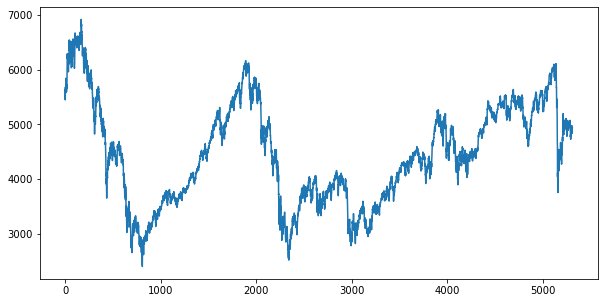

In [53]:
stock_cac40 = pd.read_csv('../prediction/'+ symbol_cac40 + '_data.csv')

plt.figure(figsize=(10,5))
stock_cac40['Close'].plot()
plt.show()

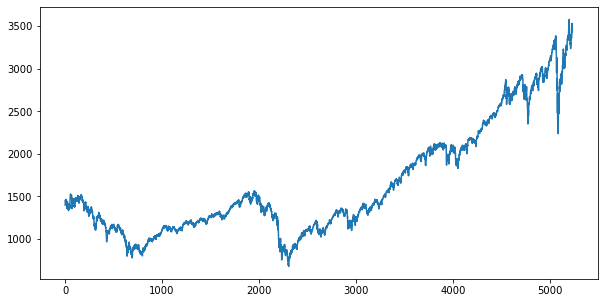

In [54]:
stock_sp500 = pd.read_csv('../prediction/' + symbol_sp500 + '_data.csv')

plt.figure(figsize=(10,5))
stock_sp500['Close'].plot()
plt.show()

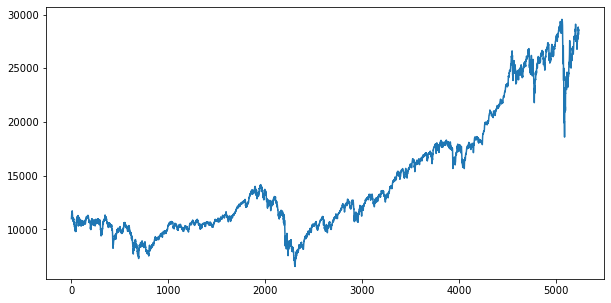

In [55]:
stock_dji = pd.read_csv('../prediction/' + symbol_dji + '_data.csv')

plt.figure(figsize=(10,5))
stock_dji['Close'].plot()
plt.show()

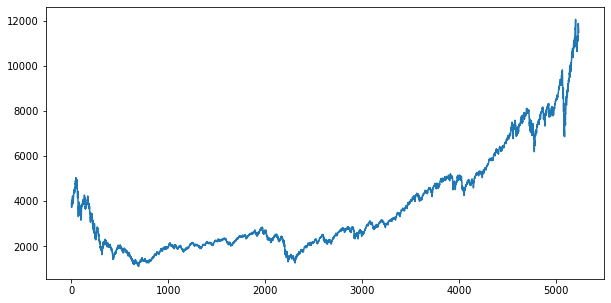

In [56]:
stock_nasdaq = pd.read_csv('../prediction/' + symbol_nasdaq + '_data.csv')

plt.figure(figsize=(10,5))
stock_nasdaq['Close'].plot()
plt.show()

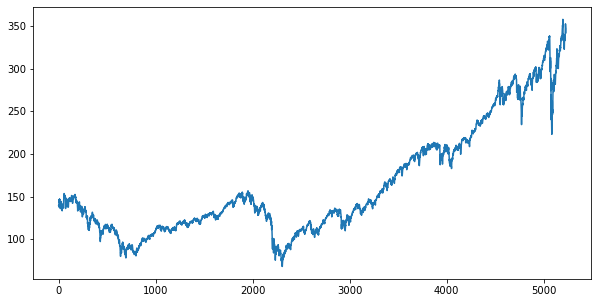

In [57]:
stock_spy = pd.read_csv('../prediction/' + symbol_spy + '_data.csv')

plt.figure(figsize=(10,5))
stock_spy['Close'].plot()
plt.show()

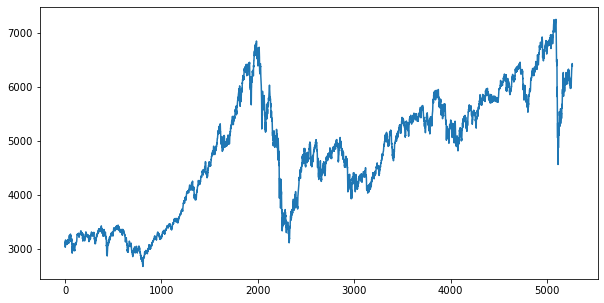

In [58]:
stock_aord = pd.read_csv('../prediction/' + symbol_aord + '_data.csv')

plt.figure(figsize=(10,5))
stock_aord['Close'].plot()
plt.show()

In [59]:
stock_nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,4020.000000,4073.250000,3898.229980,3901.689941,3901.689941,1511840000
1,2000-01-05,3854.350098,3924.209961,3734.870117,3877.540039,3877.540039,1735670000
2,2000-01-06,3834.439941,3868.760010,3715.620117,3727.129883,3727.129883,1598320000
3,2000-01-07,3711.090088,3882.669922,3711.090088,3882.620117,3882.620117,1634930000
4,2000-01-10,4002.229980,4072.360107,3958.830078,4049.669922,4049.669922,1691710000


## Step 1: Data Munging

In [60]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=stock_spy.index)

In [61]:
indicepanel['spy']=stock_spy['Open'].shift(-1)-stock_spy['Open']

indicepanel['spy_lag1']=indicepanel['spy'].shift(1)

indicepanel['sp500']=stock_sp500['Open']-stock_sp500['Open'].shift(1)

indicepanel['nasdaq']=stock_nasdaq['Open']-stock_nasdaq['Open'].shift(1)
indicepanel['dji']=stock_dji['Open']-stock_dji['Open'].shift(1)

indicepanel['cac40']=stock_cac40['Open']-stock_cac40['Open'].shift(1)
indicepanel['daxi']=stock_daxi['Open']-stock_daxi['Open'].shift(1)

indicepanel['aord']=stock_aord['Close']-stock_aord['Open']
indicepanel['hsi']=stock_hsi['Close']-stock_hsi['Open']
indicepanel['nikkei']=stock_nikkei['Close']-stock_nikkei['Open']
indicepanel['Price']=stock_spy['Open']

indicepanel.head()

In [62]:
#Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

spy           1
spy_lag1      1
sp500         1
nasdaq        1
dji           1
cac40         1
daxi          1
aord          0
hsi         110
nikkei      136
Price         0
dtype: int64

In [63]:
# We can use method 'fillna()' from dataframe to forward filling the Nan values
# Then we can drop the reminding Nan values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [64]:
#Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

spy         0
spy_lag1    0
sp500       0
nasdaq      0
dji         0
cac40       0
daxi        0
aord        0
hsi         0
nikkei      0
Price       0
dtype: int64

In [65]:
indicepanel.head()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
1,-0.31250,-3.59375,-55.799927,-165.649902,-360.379883,-400.399902,-161.390137,-73.200195,-761.831055,-460.958984,139.9375
2,0.68750,-0.31250,2.689941,-19.910156,124.000000,-35.899902,-84.399902,-20.799805,-788.839844,-405.740234,139.6250
3,5.93750,0.68750,1.339966,-123.349854,133.689453,-62.050293,-11.510254,14.399902,76.290039,-0.640625,140.3125
4,-0.43750,5.93750,38.020020,291.139893,285.420898,201.939941,295.530273,58.600098,217.150391,604.820312,146.2500
5,-1.21875,-0.43750,16.130005,29.149902,35.989258,100.689941,140.569824,61.500000,-119.030273,-102.750000,145.8125


In [66]:
indicepanel.tail()

,spy,spy_lag1,sp500,nasdaq,dji,cac40,daxi,aord,hsi,nikkei,Price
5227,-1.529999,2.690002,33.989990,169.429688,93.830078,44.870117,110.370117,108.599609,-2.101562,-20.830078,352.279999
5228,-7.040009,-1.529999,-18.540039,-12.689453,-33.648438,12.750000,127.129883,49.200195,-2.101562,-20.830078,350.750000
5229,5.250000,-7.040009,-61.750000,-329.190430,-407.900391,-125.469727,-79.250000,-192.200195,-2.101562,-20.830078,343.709991
5230,-0.309998,5.250000,39.780029,201.950195,247.320312,105.560059,-40.339844,21.100098,-2.101562,-20.830078,348.959991
5231,-0.309998,-0.309998,0.159912,-29.490234,62.830078,-78.490234,-88.009766,60.300293,-2.101562,-20.830078,348.649994


In [67]:
#save this indicepanel for part 4.5
path_save = '../prediction/indicepanel.csv'
indicepanel.to_csv(path_save)

In [68]:
print(indicepanel.shape)

(5231, 11)


## Step 2: Data Spliting

In [69]:
#Split the data into (1)train set and (2)test set

Train = indicepanel.iloc[-5196:-2598,:]
Test = indicepanel.iloc[-2598:,:]
print(Train.shape, Test.shape)

(2598, 11) (2598, 11)


## Step 3: Explore the train data set

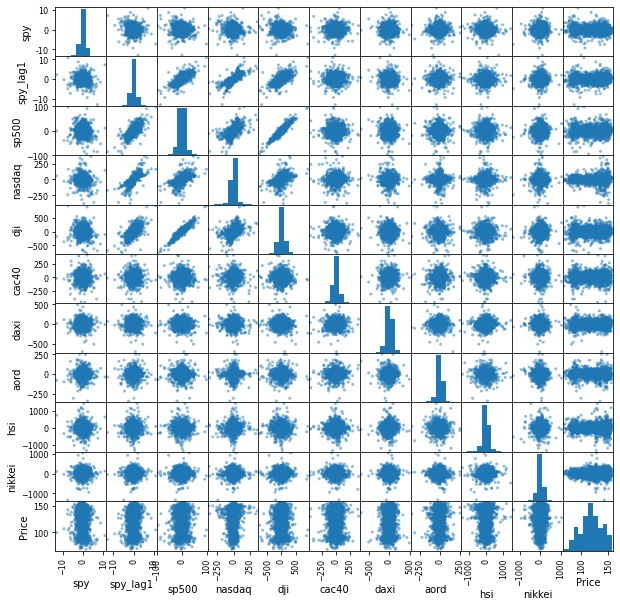

In [70]:
#Generate scatter matrix among all stock markets (& the price of SPY)
#to observe the association

from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10,10))

## Step 4: Check the coorelation of each index between spy

In [71]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.080443
sp500      -0.073189
nasdaq     -0.071601
dji        -0.072547
cac40       0.005273
daxi       -0.009303
aord        0.039728
hsi        -0.037331
nikkei      0.058841
Name: spy, dtype: float64


In [72]:
formula = 'spy~spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.207
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           2.02e-05
Time:                        07:52:35   Log-Likelihood:                -4765.1
No. Observations:                2598   AIC:                             9550.
Df Residuals:                    2588   BIC:                             9609.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0088      0.030     -0.297      0.767      -0.067       0.050
spy_lag1      -0.0354      0.038     -0.930      0.353      -0.110       0.039
sp500          0.0058      0.008      0.764      0.445      -0.009       0.021
nasdaq        -0.0012      0.001     -1.096      0.273      -0.003       0.001
dji           -0.0010      0.001     -1.281      0.200      -0.003       0.001
cac40          0.0001      0.000      0.239      0.811      -0.001       0.001
aord           0.0016      0.001      2.143      0.032       0.000       0.003
daxi          -0.0002      0.000     -0.495      0.621      -0.001       0.001
nikkei         0.0006      0.000      3.215      0.001       0.000       0.001
hsi           -0.0003      0.000     -1.820      0.069      -0.001     2.1e-05
==============================================================================
Omnibus:                      367.429   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3998.094
Skew:                          -0.270   Prob(JB):                         0.00
Kurtosis:                       9.053   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 5: Make Prediction

In [73]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

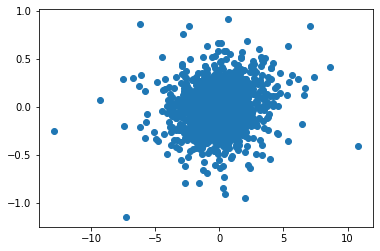

In [87]:
plt.scatter(Train['spy'], Train['PredictedY'])

## Step 6: Model Evaluation - Statiscal Standard

We can measure the performance of our model using some statistical metrics - **RMSE**, **Adjusted $R^2$ **

In [88]:
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE

In [89]:
def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

In [90]:
# Get the assement table fo our model
assessTable(Test, Train, lm, 9, 'spy')

,Train,Test
R2,0.010993,0.012107
RMSE,1.517582,2.315470


## Profit of Signal-based strategy

In [91]:
# Train
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['spy'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  334.1848678588869


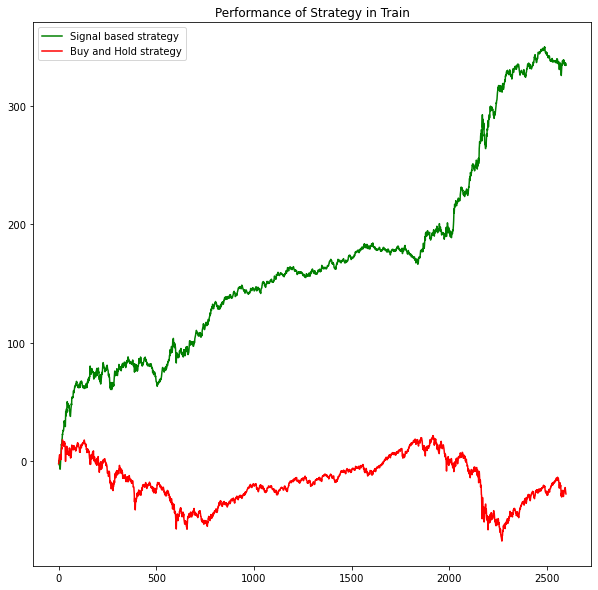

In [92]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [93]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['spy'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  159.49970245361249


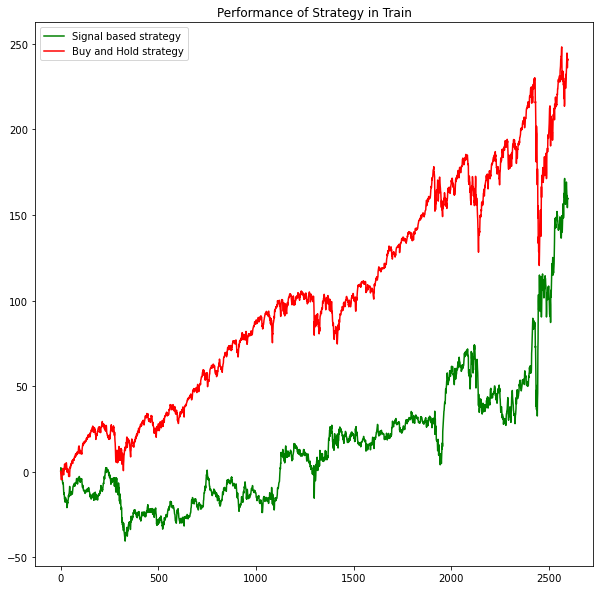

In [94]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['spy'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

# Evaluation of model - Practical Standard

We introduce two common practical standards - **Sharpe Ratio**, **Maximum Drawdown** to evaluate our model performance

In [95]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

In [96]:
# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.08401021950185554
Yearly Sharpe Ratio is  1.3336208903391502


In [97]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.021063325880781573
Yearly Sharpe Ratio is  0.33436993238675145


In [98]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.11072165314132552


In [99]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.3895552153934951
